In [115]:
import os
import numpy as np
import pandas as pd
import zipfile

f_name = 'BTCUSDT-20210903.csv'
n_secs = 3

archive = zipfile.ZipFile('./hybrid/data.zip', 'r')
archive.extract(f_name, '.')
col_names = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7']



df_btc = pd.read_csv(f_name, sep=';', header=None, usecols=[1,2], names=['Time', 'Price'])
df_cut = df_btc[:200000]


os.remove('BTCUSDT-20210903.csv')
# col3_ser_btc = df_btc['col3']
# col3_ser_btc.reset_index(drop=True, inplace=True)
# price_series_btc = np.array(col3_ser_btc)

# p_arr_btc = np.array([price_series_btc[i] for i in range(len(price_series_btc)) if i % step == 0])

print(len(df_cut))

secs_counter = 0
secs_arr = np.array([], dtype=np.int64)
for i in df_cut.index:
    t, p = df_cut.iloc[i]['Time'], df_cut.iloc[i]['Price']
    seconds = int(t) % 100
    minutes = (int(t) // 100) % 100
    hours = (int(t) // 10000)
    total_time_int = hours*3600 + minutes*60 + seconds
    cur_prices_lst = []
    # if total_time_int <= t < total_time_int + n_secs:
    secs_arr = np.append(secs_arr, total_time_int*n_secs)
    if i % 50000 == 0:
        print(i)
# df_cut['Seconds'] = secs_arr 
df_cut.loc[:,'Seconds'] = secs_arr
 
        
p_dict = dict()
t_cur = 0.

secs_arr, len(secs_arr), len(df_cut)
df_cut.head()

200000
0
50000
100000
150000


C:\Users\litvi\AppData\Local\Temp\ipykernel_2440\4196645284.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut.loc[:,'Seconds'] = secs_arr


,Time,Price,Seconds
0,0.001,49299.14,0
1,0.011,49299.13,0
2,0.039,49299.14,0
3,1.477,49299.13,3
4,1.624,49299.13,3


In [110]:
df_cut.head(100)

,Time,Price,Seconds
0,0.001,49299.14,0
1,0.011,49299.13,0
2,0.039,49299.14,0
3,1.477,49299.13,1
4,1.624,49299.13,1
...,...,...,...
95,6.188,49295.34,6
96,6.353,49295.34,6
97,6.455,49296.42,6
98,6.535,49295.34,6


In [114]:
df_new = df_cut.groupby('Seconds').tail(1) # ['Price'] #.agg([lambda x: x[-1]])
print(df_new)

           Time     Price  Seconds
2         0.039  49299.14        0
4         1.624  49299.13        3
60        3.899  49296.28        9
80        4.740  49295.50       12
92        5.929  49295.34       15
...         ...       ...      ...
19949  1813.753  49337.00     3279
19958  1814.868  49337.00     3282
19965  1815.994  49337.00     3285
19989  1816.953  49341.45     3288
19999  1817.507  49337.33     3291

[1097 rows x 3 columns]


In [120]:
def get_second(t):
    seconds = int(t) % 100
    minutes = (int(t) // 100) % 100
    hours = (int(t) // 10000)
    total_time_int = hours*3600 + minutes*60 + seconds
    return total_time_int

# stack['Country_3'] = stack.apply(function, axis=1)

df_btc['Seconds'] = df_btc['Time'].apply(get_second)

In [122]:
df_new = df_btc.groupby('Seconds').tail(1)

In [129]:
p_ser = df_new['Price']
p_ser.index = df_new['Seconds']
p_ser

Seconds
0        49299.14
1        49299.13
3        49296.28
4        49295.50
5        49295.34
           ...   
86395    50024.99
86396    50024.99
86397    50025.00
86398    50025.05
86399    50027.08
Name: Price, Length: 86373, dtype: float64

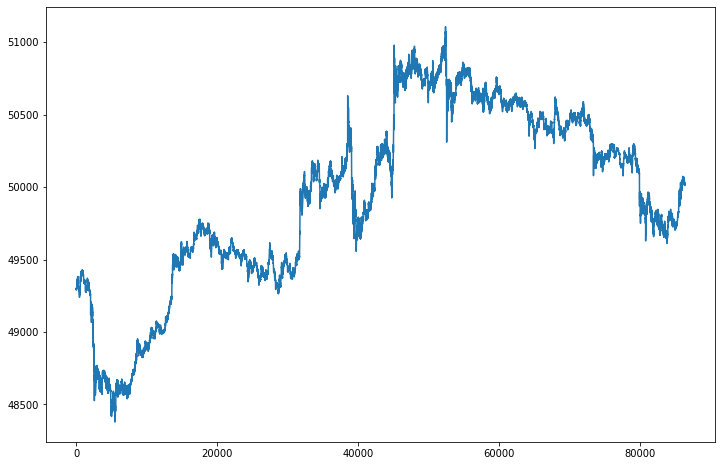

In [130]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(p_ser)
plt.show()

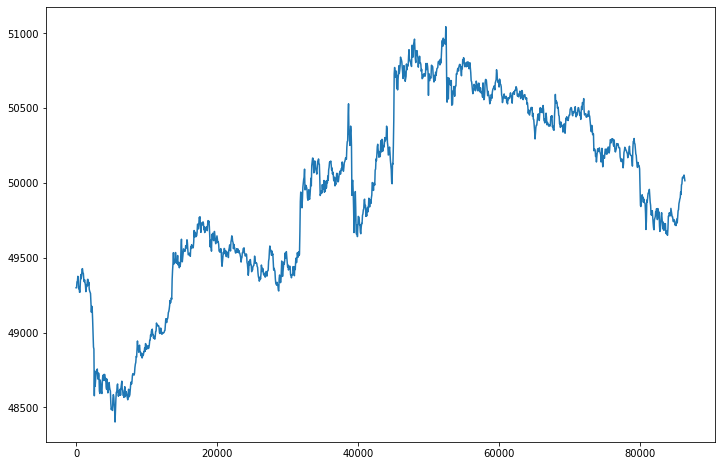

In [133]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(p_ser[::60])
plt.show()

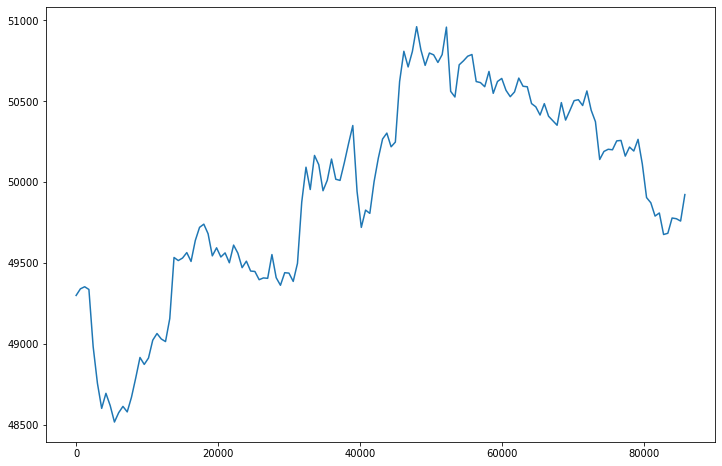

In [134]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(p_ser[::600])
plt.show()

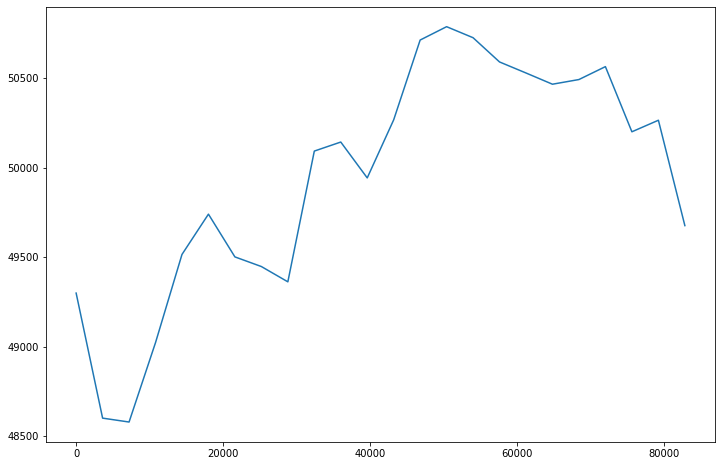

In [132]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(p_ser[::3600])
plt.show()